In [1]:
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from iexfinance.stocks import get_historical_data
from iexfinance.refdata import get_symbols
%matplotlib inline

In [2]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iexfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [2]:
IEX_KEY = os.getenv('IEX_KEY')

In [ ]:
http://finance.yahoo.com/q?s=AAPL

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [9]:
list_of_tickers = ["SPY", "AGG"]
start = datetime(2019, 1, 1)
end = datetime(2020, 1, 1)
# YOUR CODE HERE

In [7]:
# tickers=pd.DataFrame(get_symbols(output_format='pandas', token = IEX_KEY))

,symbol,exchange,name,date,type,iexId,region,currency,isEnabled
0,A,NYS,Agilent Technologies Inc.,2020-01-28,cs,IEX_46574843354B2D52,US,USD,True
1,AA,NYS,Alcoa Corp.,2020-01-28,cs,IEX_4238333734532D52,US,USD,True
2,AAAU,PSE,Perth Mint Physical Gold ETF,2020-01-28,et,IEX_474B433136332D52,US,USD,True
3,AACG,NAS,ATA Creativity Global Sponsored ADR,2020-01-28,ad,IEX_44595A4C53392D52,US,USD,True
4,AADR,PSE,AdvisorShares Dorsey Wright ADR ETF,2020-01-28,et,IEX_5253355435362D52,US,USD,True


In [17]:
# spy_data = pd.DataFrame(get_historical_data("SPY", start, end, close_only=True, token = IEX_KEY, infer_datetimeformat = True))

In [26]:
spy_data_transposed = spy_data.transpose()
spy_data_transposed.columns = ['close','volume']
spy_data_close = spy_data_transposed['close']
spy_data_close.head()

2019-01-02    250.18
2019-01-03    244.21
2019-01-04    252.39
2019-01-07    254.38
2019-01-08    256.77
Name: close, dtype: float64

In [27]:
# agg_data = pd.DataFrame(get_historical_data("AGG", start, end, close_only=True, token = IEX_KEY, infer_datetimeformat = True))

In [28]:
agg_data_transposed = agg_data.transpose()
agg_data_transposed.columns = ['close','volume']
agg_data_close = agg_data_transposed['close']
agg_data_close.head()

2019-01-02    106.57
2019-01-03    107.01
2019-01-04    106.69
2019-01-07    106.51
2019-01-08    106.43
Name: close, dtype: float64

In [33]:
agg_and_spy = pd.concat([agg_data_close,spy_data_close], axis = 'columns', join = 'inner')
agg_and_spy.columns = ['AGG Close','SPY Close']
agg_and_spy.head()

,AGG Close,SPY Close
2019-01-02,106.57,250.18
2019-01-03,107.01,244.21
2019-01-04,106.69,252.39
2019-01-07,106.51,254.38
2019-01-08,106.43,256.77


# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 500 iterations and generate at least 30 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 30 years

In [59]:
# Calculate the daily roi for the stocks
daily_returns = agg_and_spy.pct_change()
# YOUR CODE HERE

,AGG Close,SPY Close
2019-01-02,NaN,NaN
2019-01-03,0.004129,-0.023863
2019-01-04,-0.002990,0.033496
2019-01-07,-0.001687,0.007885
2019-01-08,-0.000751,0.009395


In [65]:
# find mean daily returns
avg_return_agg = daily_returns.mean()['AGG Close']
avg_return_spy = daily_returns.mean()['SPY Close']

In [35]:
# Weight the Portfolio
weights = [0.4, 0.6]
portfolio_returns = daily_returns.dot(weights)

In [61]:
# Calculate volatility
print(f'The volatility of your portfolio is {portfolio_returns.std()}')
vol_agg = daily_returns.std()['AGG Close']
vol_spy = daily_returns.std()['SPY Close']
# YOUR CODE HERE

The volatility of your portfolio is 0.004568417946031576


In [67]:
# Save the last day's closing price
agg_last_price = agg_and_spy['AGG Close'][-1]
spy_last_price = agg_and_spy['SPY Close'][-1]
# YOUR CODE HERE

In [93]:
252*30

7560

In [94]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 7560
monte_carlo = pd.DataFrame()

simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()



In [95]:
# Run the Monte Carlo Simulation
for x in range(number_simulations):
    
    simulated_agg_prices = [agg_last_price]
    simulated_spy_prices = [spy_last_price]
    
    for i in range(number_records):
        simulated_agg_price = simulated_agg_prices[-1]*(1+ np.random.normal(avg_return_agg,vol_agg))
        simulated_spy_price = simulated_spy_prices[-1]*(1+ np.random.normal(avg_return_spy,vol_spy))
        
        simulated_agg_prices.append(simulated_agg_price)
        simulated_spy_prices.append(simulated_spy_price)
    
    simulated_price_df["AGG Prices"] = pd.Series(simulated_agg_prices)
    simulated_price_df["SPY Prices"] = pd.Series(simulated_spy_prices)
    
    simulated_daily_returns = simulated_price_df.pct_change()
    
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    portfolio_cumulative_returns[x] = (1+ portfolio_daily_returns.fillna(0)).cumprod()

portfolio_cumulative_returns.head()
    
    
    

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001971,1.003490,1.004287,0.996753,0.999867,1.003950,0.993633,1.002131,1.001353,1.007247,...,0.995382,0.985562,0.999455,1.002805,1.006218,0.999259,0.993729,0.997674,1.001803,0.995595
2,0.995133,1.002778,1.003001,0.998286,1.004504,1.007101,0.997801,1.004345,1.004424,0.999059,...,0.991325,0.985061,0.999433,0.997039,1.004492,0.999864,0.991328,0.996108,0.996573,0.994494
3,0.995669,1.005827,0.997458,0.996165,0.998373,1.004885,1.007063,1.006444,1.007333,1.000852,...,0.988751,0.984224,1.009428,1.003490,1.006277,1.002685,0.989252,0.993555,0.996970,1.004636
4,0.998317,0.998814,1.001274,1.002401,0.997527,1.005811,1.000910,1.006856,1.020931,0.999158,...,0.983209,0.979566,1.011406,1.005571,1.002494,0.999651,0.986608,0.989740,0.992365,1.003461


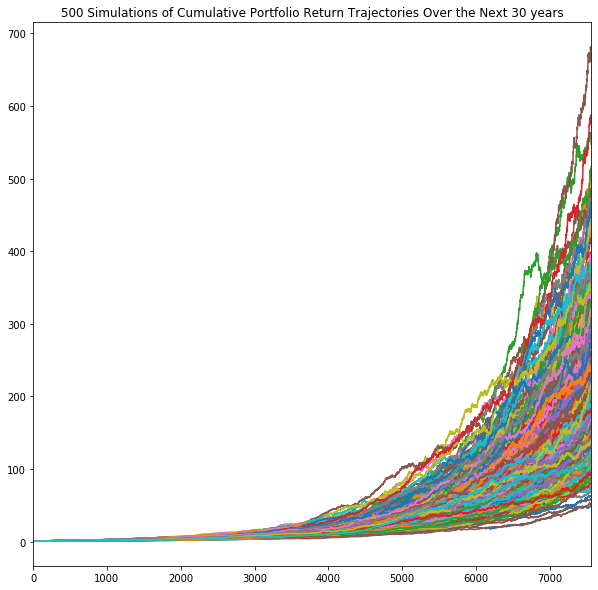

In [96]:
# Visualize the Simulation
plot_title = f"{x+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 30 years"
portfolio_cumulative_returns.plot(legend=None, title=plot_title, figsize = (10,10))
# YOUR CODE HERE

In [97]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
portfolio_cumulative_returns.iloc[[-1]]
# YOUR CODE HERE

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
7560,237.755693,355.950921,138.03872,124.682451,379.264841,153.497841,131.315263,110.837342,293.636045,152.232884,...,270.971475,235.461468,87.653736,95.729666,171.473516,209.207999,317.861665,356.295932,215.066944,120.286476


In [112]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
port_returns_transposed = portfolio_cumulative_returns.transpose()
port_returns_transposed.head()
# YOUR CODE HERE

,0,1,2,3,4,5,6,7,8,9,...,7551,7552,7553,7554,7555,7556,7557,7558,7559,7560
0,1.0,1.001971,0.995133,0.995669,0.998317,1.002309,0.997214,1.000268,0.993665,0.986924,...,241.295757,241.001039,240.963943,239.042213,237.971761,236.117960,238.167913,240.256907,239.361820,237.755693
1,1.0,1.003490,1.002778,1.005827,0.998814,0.999381,1.005318,1.002239,1.011242,1.018130,...,357.353291,359.695413,359.002592,359.050483,358.167734,355.373231,355.663063,355.859289,356.114293,355.950921
2,1.0,1.004287,1.003001,0.997458,1.001274,0.999884,0.997735,0.991114,0.987977,0.995103,...,138.384534,138.442064,139.618257,139.579291,140.131365,140.826702,139.002248,139.333823,138.596555,138.038720
3,1.0,0.996753,0.998286,0.996165,1.002401,0.993541,0.995523,0.998707,0.998060,0.998145,...,120.417957,121.643527,121.163723,120.573255,121.383910,121.806357,123.284462,124.590223,124.900085,124.682451
4,1.0,0.999867,1.004504,0.998373,0.997527,1.006300,1.002501,1.004832,1.001510,1.000051,...,386.737502,388.019661,386.150687,386.221610,384.744302,384.276788,385.057676,382.661890,380.461224,379.264841


In [113]:
# Display the 90% confidence interval for the ending returns
confidence_interval = port_returns_transposed.quantile(q=[0.05, 0.95])
confidence_interval
# YOUR CODE HERE

,0,1,2,3,4,5,6,7,8,9,...,7551,7552,7553,7554,7555,7556,7557,7558,7559,7560
0.05,1.0,0.993187,0.990778,0.988793,0.987404,0.985044,0.983440,0.983920,0.981696,0.980243,...,91.641916,91.474642,91.877025,92.723235,92.739801,92.709506,92.569420,93.322101,93.375439,93.301159
0.95,1.0,1.008419,1.011677,1.015571,1.018701,1.023656,1.025632,1.027041,1.028143,1.030935,...,371.340215,371.762412,372.322005,370.330096,374.139140,375.287273,374.553497,374.713113,376.171535,375.277637


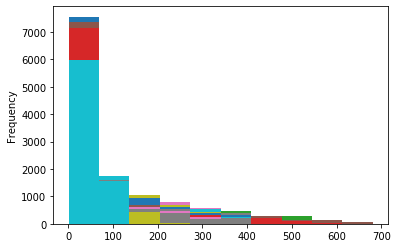

In [116]:
portfolio_cumulative_returns.plot(kind='hist', bins=10, legend = None)

In [ ]:
# Visualize the distribution of the ending returns
port_returns_transposed.plot.hist(legend=None)

# YOUR CODE HERE

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [ ]:
# YOUR CODE HERE
port_returns_transposed.quantile(q=[0.10, 0.50, 0.90])

### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [ ]:
# YOUR CODE HERE

### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [ ]:
# YOUR CODE HERE

### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [ ]:
# YOUR CODE HERE

### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# YOUR CODE HERE